In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
from scipy.stats import norm, gamma

from sklearn.linear_model import LinearRegression

In [5]:
file = pd.read_csv('salaries.csv')
df = file[file['job_title'] == 'Security Engineer'][:1001]
df = df[df['work_year'] == 2023]
new_df = df[df['work_year'] == 2023]
new_df.loc[:, 'salary'] = df['salary'] / 1000
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2023,SE,FT,Security Engineer,247.250,USD,247250,US,0,US,M
3,2023,SE,FT,Security Engineer,160.000,USD,160000,US,0,US,M
4,2023,SE,FT,Security Engineer,224.250,USD,224250,US,0,US,M
5,2023,SE,FT,Security Engineer,116.000,USD,116000,US,0,US,M
8,2023,SE,FT,Security Engineer,384.348,USD,384348,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1932,2023,SE,FT,Security Engineer,189.400,USD,189400,US,0,US,M
1935,2023,SE,FT,Security Engineer,189.750,USD,189750,US,0,US,M
1936,2023,SE,FT,Security Engineer,131.100,USD,131100,US,0,US,M
1937,2023,SE,FT,Security Engineer,204.500,USD,204500,US,0,US,M


In [6]:
new_df['experience_level'] = new_df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
new_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2023,3,FT,Security Engineer,247.250,USD,247250,US,0,US,M
3,2023,3,FT,Security Engineer,160.000,USD,160000,US,0,US,M
4,2023,3,FT,Security Engineer,224.250,USD,224250,US,0,US,M
5,2023,3,FT,Security Engineer,116.000,USD,116000,US,0,US,M
8,2023,3,FT,Security Engineer,384.348,USD,384348,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1932,2023,3,FT,Security Engineer,189.400,USD,189400,US,0,US,M
1935,2023,3,FT,Security Engineer,189.750,USD,189750,US,0,US,M
1936,2023,3,FT,Security Engineer,131.100,USD,131100,US,0,US,M
1937,2023,3,FT,Security Engineer,204.500,USD,204500,US,0,US,M


In [7]:
dz = new_df.groupby("work_year").agg({"salary": [np.size, np.mean, np.std, np.var]})
dz

salary                                  
            size       mean       std          var
work_year                                         
2023        1001  179.90782  65.59315  4302.461296

In [8]:
# skew
skew = new_df['salary'].skew()
skew

0.6807759052684799

In [9]:
# confidence level is 95%

In [10]:
# mean
mean = new_df['salary'].mean()
n = new_df['salary'].count()
t = 1.962
lcb = mean - (t * (new_df['salary'].std() / np.sqrt(n))) 
ucb = mean + (t * (new_df['salary'].std() / np.sqrt(n))) 
(lcb, ucb)

(175.84019946470107, 183.9754408949393)

In [11]:
# var
var = new_df['salary'].var()
n = new_df['salary'].count()
xi2_lcb = 129.561
xi2_ucb = 74.222
var_lcb = ((n - 1) * var) / xi2_lcb
var_ucb = ((n - 1) * var) / xi2_ucb
(var_lcb, var_ucb)

(33207.99697285168, 57967.466462768956)

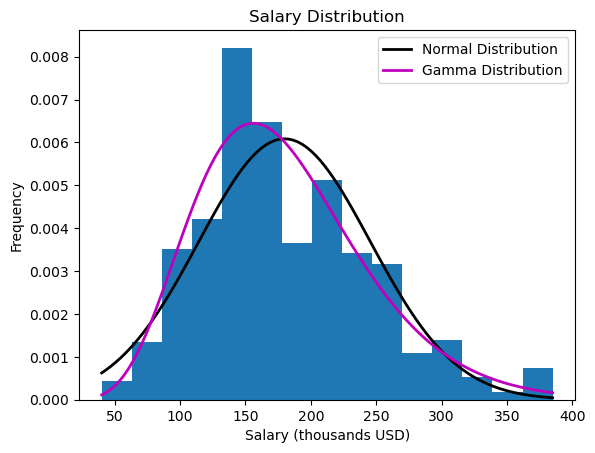

In [12]:
salaries = sorted(list(new_df['salary']))

plt.hist(salaries, bins=15, density=True)

mu, std = np.mean(salaries), np.std(salaries)
x = np.linspace(min(salaries), max(salaries), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

params = gamma.fit(salaries)
p = gamma.pdf(x, *params)
plt.plot(x, p, 'm', linewidth=2, label='Gamma Distribution')

plt.title('Salary Distribution')
plt.xlabel('Salary (thousands USD)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [ ]:
# regression

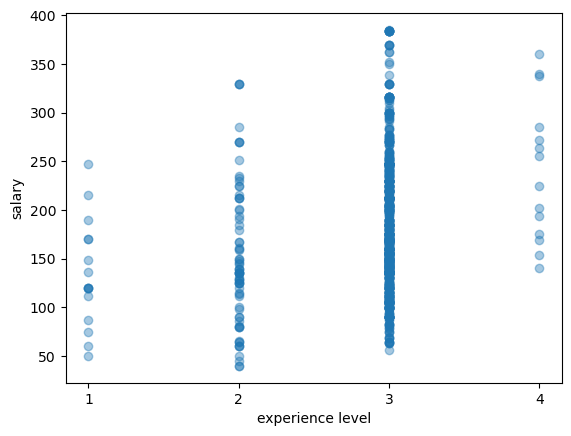

In [22]:
plt.scatter(new_df.experience_level, new_df.salary, alpha=0.4)
plt.xlabel('experience level')
plt.ylabel('salary')
plt.xticks([1, 2, 3, 4])
plt.show()

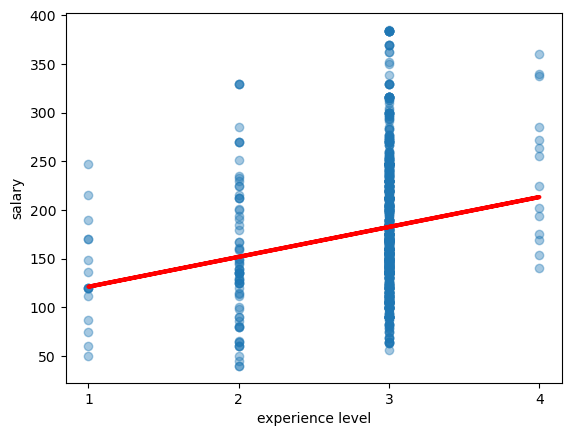

In [33]:
plt.scatter(new_df.experience_level, new_df.salary, alpha=0.4)
plt.xlabel('experience level')
plt.ylabel('salary')
plt.xticks([1, 2, 3, 4])

model = LinearRegression()
X = pd.DataFrame(new_df.experience_level)
Y = pd.DataFrame(new_df.salary)
model.fit(X, Y)

plt.plot(X, model.predict(X), color='red', linewidth=3)

plt.show()